In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

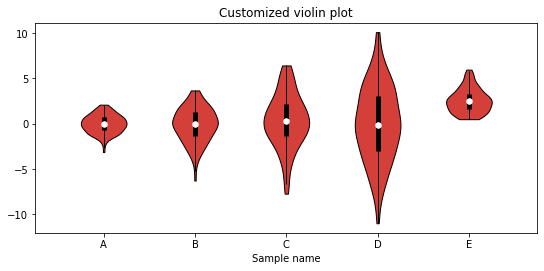

In [9]:


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

data += [sorted(3 * np.random.weibull(2, 100))]

fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D', 'E']

set_axis_style(ax2, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

In [1]:
np.random.weibull?

In [26]:

class MultiArmedBandit:
    def __init__(K=10, mu=None, sigma=None, seed=None):
        self.K = K
        self.mu = mu
        self.sigma = sigma
        self.seed = seed
        
        if self.mu is None and self.sigma is None:
            self._init_random_distributions()
            
    def _init_random_distribution(self):
        if self.seed is not None:
            np.seed(self.seed)
        self.mu = tuple(np.random.uniform(-3, 3, size=self.K))
        self.sigma = tuple(np.random.normal(0, 2, size=self.K))
    
    def show_distributions(self):
        pass
    
    def draw_from_arm(self, k):
        if k not in range(1, self.K + 1):
            raise ValueError(f"The arm k={k} must be between 1 and {self.K + 1}.")
        return np.random.normal(self.mu[k], self.sigma[k])
    
    def random_parameters_update(self, ):
        pass

array([ 0.39149288, -2.43842736,  1.18605878, -0.17371077,  1.15471087,
       -0.83188302, -0.9955948 ,  2.86972589,  1.97032882,  0.29434301])